Start again with the modeling because the other files have gotten too messy.

Start by: Loading data.

### Data
- Instead of doing all the data wrangling every time, just load the pre-prepared csv files from github.


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [38]:
url1 = 'https://raw.githubusercontent.com/inga-maria01/master_thesis/main/data/model_data_no_sentiment.csv'

df = pd.read_csv(url1)
df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)
df.head()

,Unnamed: 0,Date,Volatility,stock_returns,stock_volume,US_log_inflation,US_interest_rate,consumer_barometer,Volatility_lag1,stock_returns_lag1,stock_volume_lag1,US_log_inflation_lag1,US_interest_rate_lag1,consumer_barometer_lag1
0,1254,2015-01-06,19.05,-1.340836,66205500,-0.639069,0.75,0.353886,18.00,-1.466868,36521300.0,-0.639069,0.75,0.353886
1,1253,2015-01-07,17.20,1.289125,37577400,-0.639069,0.75,0.353886,19.05,-1.340836,66205500.0,-0.639069,0.75,0.353886
2,1252,2015-01-08,16.61,1.913960,40212600,-0.639069,0.75,0.353886,17.20,1.289125,37577400.0,-0.639069,0.75,0.353886
3,1251,2015-01-09,16.60,-0.658282,41410100,-0.639069,0.75,0.353886,16.61,1.913960,40212600.0,-0.639069,0.75,0.353886
4,1250,2015-01-12,17.88,-1.042701,34129800,-0.639069,0.75,0.353886,16.60,-0.658282,41410100.0,-0.639069,0.75,0.353886


In [37]:
sentiment = pd.read_excel('https://raw.githubusercontent.com/inga-maria01/master_thesis/main/index/sentiment_index_unweighted_v2.xlsx')
sentiment['date'] = pd.to_datetime(sentiment['date'])
sentiment = sentiment.rename(columns = {'date':'Date'})
sentiment['sentiment_lag'] = sentiment['sentiment_score'].shift(1)
sentiment.head()

,Date,sentiment_score,moving_average,sentiment_lag
0,2015-01-01,0.162815,NaN,NaN
1,2015-01-02,0.150871,NaN,0.162815
2,2015-01-03,0.166915,NaN,0.150871
3,2015-01-04,0.167746,NaN,0.166915
4,2015-01-05,0.177792,NaN,0.167746


In [39]:
df = pd.merge(df, sentiment[['Date', 'sentiment_lag']], on ='Date', how='inner')
df.set_index('Date', inplace=True)
df.head()

,Unnamed: 0,Volatility,stock_returns,stock_volume,US_log_inflation,US_interest_rate,consumer_barometer,Volatility_lag1,stock_returns_lag1,stock_volume_lag1,US_log_inflation_lag1,US_interest_rate_lag1,consumer_barometer_lag1,sentiment_lag
Date,,,,,,,,,,,,,,
2015-01-06,1254,19.05,-1.340836,66205500,-0.639069,0.75,0.353886,18.00,-1.466868,36521300.0,-0.639069,0.75,0.353886,0.177792
2015-01-07,1253,17.20,1.289125,37577400,-0.639069,0.75,0.353886,19.05,-1.340836,66205500.0,-0.639069,0.75,0.353886,0.173945
2015-01-08,1252,16.61,1.913960,40212600,-0.639069,0.75,0.353886,17.20,1.289125,37577400.0,-0.639069,0.75,0.353886,0.185810
2015-01-09,1251,16.60,-0.658282,41410100,-0.639069,0.75,0.353886,16.61,1.913960,40212600.0,-0.639069,0.75,0.353886,0.216864
2015-01-12,1250,17.88,-1.042701,34129800,-0.639069,0.75,0.353886,16.60,-0.658282,41410100.0,-0.639069,0.75,0.353886,0.188542


In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
#Split data into train and test:
#set test size to 251, so only the year 2019 is our test data. (from 02.01.2019 to 30.12.2019)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,-7:], df['Volatility'], test_size=251, shuffle=False)

X_train.head()

,Volatility_lag1,stock_returns_lag1,stock_volume_lag1,US_log_inflation_lag1,US_interest_rate_lag1,consumer_barometer_lag1,sentiment_lag
Date,,,,,,,
2015-01-06,18.00,-1.466868,36521300.0,-0.639069,0.75,0.353886,0.177792
2015-01-07,19.05,-1.340836,66205500.0,-0.639069,0.75,0.353886,0.173945
2015-01-08,17.20,1.289125,37577400.0,-0.639069,0.75,0.353886,0.185810
2015-01-09,16.61,1.913960,40212600.0,-0.639069,0.75,0.353886,0.216864
2015-01-12,16.60,-0.658282,41410100.0,-0.639069,0.75,0.353886,0.188542


### Models

- Start by defining a pipeline for the rolling window stuff, where it starts by standardizing the data for each window, and then trains the model for each window.

In [6]:
# #We want the pipeline to:
# # 1. implement rolling window stuff
# # 2. for each window of stada standardize the data
# # 3. 
# stdz_1a = StandardScaler()
# PCA_1a = PCA(n_components=2)
# lm_1a = LinearRegression()

# # Set up the pipeline
# pcr_pipe_1a = Pipeline([
#     ('standardize', stdz_1a),
#     ('rolling_window', PCA_1a),
#     ('gradient_boosting', lm_1a)
# ])
# #something like that???

# # To fit the pipeline, you would use the following code. 
# # You'll need to replace `mkt_ret_12m_train` and `portfolios_train` with your actual data variables:
# pcr_fit_1a = pcr_pipe_1a.fit(portfolios_train, mkt_ret_12m_train)

# # Once fitted, `pcr_fit_1a` will contain the model trained on your data.


Idk if i understand the pipeline stuff enough.... move on for now

Next steps:
1. Standardize input of rolling window before training
should be able to do automatically in sklearn with pipeline stuff
look at dabn13 python assignments (the ones we did in r)
2. do function that takes in the predicted volatility and returns the overall sharpe ratio (at first just based on arbitrary thresholds) 
3. Do AR1 first then the models on the residuals
4. Use correct cross validation stuff (sklearn time series stuff)
5. extract intra day sentiment slope and curvature and use as input for the models 
6. start writing down entire approach


### Function that takes predicted volatility as input and returns overall sharpe ratio:
- start with arbitrary threshold values, can tune later.
- start by getting finance data from csv files:

In [114]:
#need volatility data and the data from the risk_adjusted_returns file:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# first we need the historical data: 
url_nasdaq_price = 'https://raw.githubusercontent.com/inga-maria01/master_thesis/main/data/QQQ.csv'
price_df = pd.read_csv(url_nasdaq_price)
price_df['Date'] = pd.to_datetime(price_df['Date'])

# we now need to calculate the returns:
price_df['r_ndq'] = (price_df['Adj Close'] - price_df['Adj Close'].shift(1)) / price_df['Adj Close'].shift(1)
price_df.dropna(inplace=True)
price_df.head()

# low risk asset:
rf_df = pd.read_csv('https://raw.githubusercontent.com/inga-maria01/master_thesis/main/data/IEF.csv')
rf_df['r_rf'] = (rf_df['Adj Close'] - rf_df['Adj Close'].shift(1)) / rf_df['Adj Close'].shift(1)
rf_df.dropna(inplace=True)
rf_df['Date'] = pd.to_datetime(rf_df['Date'])

portfolio_df = pd.merge(price_df[['Date', 'r_ndq']], 
                     rf_df[['Date', 'r_rf']], 
                     on='Date', 
                     how='inner')

print(portfolio_df.head())

r_rf_df = pd.read_csv('https://raw.githubusercontent.com/inga-maria01/master_thesis/main/data/risk_free_rate.csv')

#divide by 100 because it was already in % -> we dont want that here!
#then divide by 252 since its on a yearly basis but everything else is on a daily basis
#(252 ~ number of us trading days a year)
r_rf_df['rf_rate'] = r_rf_df['rf_rate']/(100*252)
r_rf_df['Date'] = pd.to_datetime(r_rf_df['Date'])
print(r_rf_df.head())

portfolio_df = pd.merge(portfolio_df, 
                        r_rf_df[['Date', 'rf_rate']], 
                        on='Date', 
                        how='inner')

portfolio_df.set_index('Date', inplace=True)
portfolio_df = portfolio_df['2019-01-01':]
portfolio_df.head()

        Date     r_ndq      r_rf
0 2015-01-05 -0.014669  0.006101
1 2015-01-06 -0.013408  0.006718
2 2015-01-07  0.012891 -0.000186
3 2015-01-08  0.019140 -0.004079
4 2015-01-09 -0.006583  0.004933
   Unnamed: 0       Date       rf_rate
0         250 2015-01-02  7.936508e-07
1         249 2015-01-05  1.190476e-06
2         248 2015-01-06  1.190476e-06
3         247 2015-01-07  1.190476e-06
4         246 2015-01-08  1.190476e-06


,r_ndq,r_rf,rf_rate
Date,,,
2019-01-02,0.004019,0.002111,0.000096
2019-01-03,-0.032670,0.007948,0.000096
2019-01-04,0.042785,-0.008076,0.000096
2019-01-07,0.011906,-0.002778,0.000098
2019-01-08,0.009045,-0.002497,0.000098


In [115]:
# just choosing random values for s (20) and r (15) here, would be better to optimize those as well!
def overall_sharpe(volatility_prediction):
    w_ndq = []
    w_rf = []
    for volatility in volatility_prediction:
        if volatility > 20:
            w_ndq.append(0)
            w_rf.append(1)
        elif volatility <= 20 and volatility > 15:
            w_ndq.append(0.6)
            w_rf.append(0.4)
        elif volatility <= 15:
            w_ndq.append(1)
            w_rf.append(0)
    portfolio_df['w_ndq'] = w_ndq
    portfolio_df['w_rf'] = w_rf
    portfolio_df['r_portfolio'] = portfolio_df['w_ndq'] * portfolio_df['r_ndq'] + portfolio_df['w_rf'] * portfolio_df['r_rf']
    mean_return_portfolio = portfolio_df['r_portfolio'].mean()
    std_portfolio = np.std(portfolio_df['r_portfolio'])
    mean_risk_free_rate = portfolio_df['rf_rate'].mean()
    sharpe_ratio = (mean_return_portfolio - mean_risk_free_rate)/std_portfolio
    return sharpe_ratio


#### The overall sharpe ratio for the benchmark portfolio for the test period (2019) is 15.261359040676803

### First fit an AR(1) model to the data and then fit machine learning models on the residuals!

In [10]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(y_train, lags=1) #ARIMA(train_data, order=(1, 0, 0)) #AR(1)
model_fit = model.fit()

c:\Users\ingam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [11]:
train_residuals = model_fit.resid

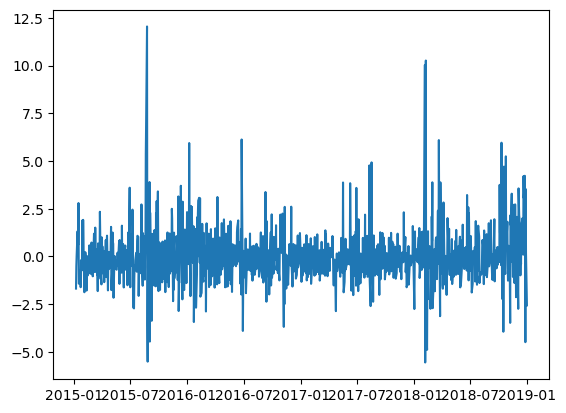

In [12]:
plt.plot(train_residuals)

In [13]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg


# Initialize lists to store MSE values and forecasts
test_residuals = []
forecast_AR1 = []

# Define the initial training and test data
train_data = y_train.copy()
test_data = y_test.copy()


for i in test_data.index:
    #print(len(train_data))
    model = AutoReg(train_data, lags=1)
    #model = ARIMA(train_data, order=(1, 0, 0)) #AR(1)
    model_fit = model.fit()
    forecast = model_fit.predict(start=len(train_data), end=len(train_data))
    forecast = model_fit.forecast(steps=1)
    #get_forecast = model_fit.get_forecast(steps=1)

    #forecast = get_forecast.predicted_mean

    #print(len(forecast))

    #print(forecast)
    forecast_AR1.append(forecast)
    
    res = test_data[i] - forecast
    test_residuals.append(res)

    # Expand estimation window
    test_to_train = pd.Series([test_data[i]], index=[i])
    #print(test_to_train)
    train_data = pd.concat([train_data, test_to_train])
    train_data = train_data.iloc[1:]
    #print(len(train_data))


    #print(train_data[-5:])

# Calculate the overall average MSE
mse_AR1 = np.mean(np.square(test_residuals))
print("Overall average MSE:", mse_AR1)

rmse_ar1 = np.sqrt(mean_squared_error(y_test, forecast_AR1))
r2_ar1 = r2_score(y_test, forecast_AR1)
print(f'RMSE: {rmse_ar1}, R2: {r2_ar1}')


Overall average MSE: 1.8840328712966086
RMSE: 1.3726007690864115, R2: 0.8268453017833577


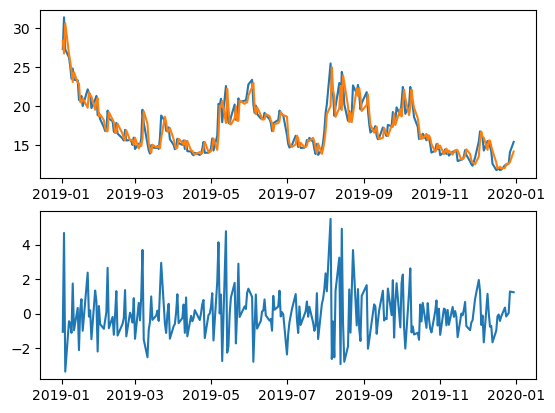

In [14]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(y_test)
plt.plot(y_test.index, forecast_AR1)
plt.subplot(2,1,2)
plt.plot(y_test.index, test_residuals)

In [45]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import  GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
# new y_train : train_residuals, new y_test : test_residuals

# Models to be used
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Hyperparameters for tuning
parameters = {
    "Random Forest": {'n_estimators': range(10,20), 'max_depth': range(1,5)}, #number of trees in the forest and max depth
    "Gradient Boosting": {'n_estimators': range(5,15), 'learning_rate': np.linspace(0.05,0.1,6), 'max_depth': [3,4,5]}
}

# Storing model performance
model_performance = {}
model_predictions = {}

# Tuning hyperparameters and evaluating each model
for model_name in models:
    print('Model:  ', model_name)
    model = models[model_name]
    params = parameters[model_name]
    print(params)
    
    # Using GridSearchCV for hyperparameter tuning
    param_search = GridSearchCV(estimator=model, param_grid=params, cv=TimeSeriesSplit(), scoring='neg_mean_squared_error')
    param_search.fit(np.array(X_train['sentiment_lag'][1:]).reshape(-1, 1), train_residuals)

    # Best model
    best_model = param_search.best_estimator_
    
    #Print the best model:
    print(best_model)
    
    # Predict on test set
    y_pred = best_model.predict(np.array(X_test['sentiment_lag']).reshape(-1, 1))

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(test_residuals, y_pred))
    r2 = r2_score(test_residuals, y_pred)

    # Store results
    model_performance[model_name] = {'RMSE': rmse, 
                                     'R2': r2,
                                     'Best Params': param_search.best_params_}

    # Store predictions to use for visualization:
    model_predictions[model_name] = {'y_pred' : y_pred}
    
# Output model performance

print(model_performance)

Model:   Random Forest
{'n_estimators': range(10, 20), 'max_depth': range(1, 5)}
RandomForestRegressor(max_depth=1, n_estimators=10, random_state=42)
Model:   Gradient Boosting
{'n_estimators': range(5, 15), 'learning_rate': array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]), 'max_depth': [3, 4, 5]}
GradientBoostingRegressor(learning_rate=0.060000000000000005, n_estimators=6,
                          random_state=42)
{'Random Forest': {'RMSE': 1.3940993740528598, 'R2': -0.03175605813199356, 'Best Params': {'max_depth': 1, 'n_estimators': 10}}, 'Gradient Boosting': {'RMSE': 1.3764976337507633, 'R2': -0.005866863939682387, 'Best Params': {'learning_rate': 0.060000000000000005, 'max_depth': 3, 'n_estimators': 6}}}


In [ ]:
rf_model = RandomForestRegressor(max_depth=3, n_estimators=19, random_state=42)
rf_model.fit()


In [46]:

# Extract model prediction values for random forest, AdaBoost and gradient boosting:

y_pred_rf = model_predictions['Random Forest']['y_pred']
#y_pred_ab = model_predictions['AdaBoost']['y_pred']
y_pred_gb = model_predictions['Gradient Boosting']['y_pred']

r2_rf = model_performance['Random Forest']['R2']
#r2_ab = model_performance['AdaBoost']['R2']
r2_gb = model_performance['Gradient Boosting']['R2']

rmse_rf = model_performance['Random Forest']['RMSE']
#rmse_ab = model_performance['AdaBoost']['RMSE']
rmse_gb = model_performance['Gradient Boosting']['RMSE']

compare_performance = {'Random Forest': f'R2: {r2_rf}, RMSE: {rmse_rf}',
                       #'AdaBoost': f'R2: {r2_ab}, RMSE: {rmse_ab}',
                       'Gradient Boosting': f'R2: {r2_gb}, RMSE: {rmse_gb}',
}

model_names = ['Random Forest', 'Gradient Boosting']

for model in model_names:
    print(model, ':', compare_performance[model])
    

Random Forest : R2: -0.03175605813199356, RMSE: 1.3940993740528598
Gradient Boosting : R2: -0.005866863939682387, RMSE: 1.3764976337507633


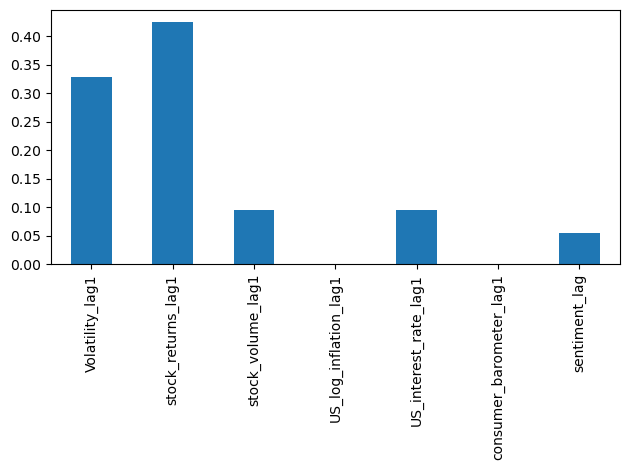

In [47]:
rf = RandomForestRegressor(max_depth=1, n_estimators=73, random_state=42)
rf.fit(X_train[1:], train_residuals)
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
fig, ax = plt.subplots()
importances.plot.bar(ax=ax)
fig.tight_layout()

In [49]:
# Rolling window (window size is 80% of data)
from xgboost import XGBRegressor
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Initialize lists to store MSE values and forecasts
res_MA3 = []
forecast_MA3 = []
conf_MA3 = []

X_train_roll = X_train[1:].copy()
X_test_roll = X_test.copy()
y_train_roll = pd.Series(train_residuals).copy()
y_test_roll = pd.Series(test_residuals.copy())

for i in range(len(X_test)):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_roll)
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X_train_roll.columns)
    X_test_scaled = scaler.transform(X_test_roll)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X_test_roll.columns)
    #print(len(train_data))
    # model = AutoReg(train_data, lags=optimal_lag_bic) # optimal lag = 10
    model = RandomForestRegressor(max_depth=1, n_estimators=73, random_state=1)
    model_fit = model.fit(X_train_scaled_df, y_train_roll)

    #forecast = model_fit.predict(start=len(train_data), end=len(train_data))
    # forecast = model_fit.forecast(steps=1)
    get_forecast = model_fit.predict(pd.DataFrame(np.array(X_test_scaled_df.iloc[i]).reshape(1, -1), columns = X_test_roll.columns))

    forecast_MA3.append(get_forecast)

    res = y_test_roll.iloc[i] - get_forecast
    res_MA3.append(res)

    # Expand estimation window
    test_to_train = y_test_roll.iloc[i]
    
    #print(test_to_train)
    X_train_roll = pd.concat([X_train_roll, X_test_roll.iloc[[i]]], ignore_index=True)
    y_train_roll = pd.concat([y_train_roll, test_to_train], ignore_index=True)
    X_train_roll = X_train_roll.iloc[1:]
    y_train_roll = y_train_roll.iloc[1:]
    
    #print(train_data[-5:])

# Calculate the overall average MSE
mse_MA3 = np.mean(np.square(res_MA3))
print("Overall average MSE:", mse_MA3)

#RMSE:
print("RMSE:", np.sqrt(mean_squared_error(test_residuals, forecast_MA3)))
#R2:
print("R2:", r2_score(test_residuals, forecast_MA3))

Overall average MSE: 1.894251186154949
RMSE: 1.3763179814835484
R2: -0.005604321577326488


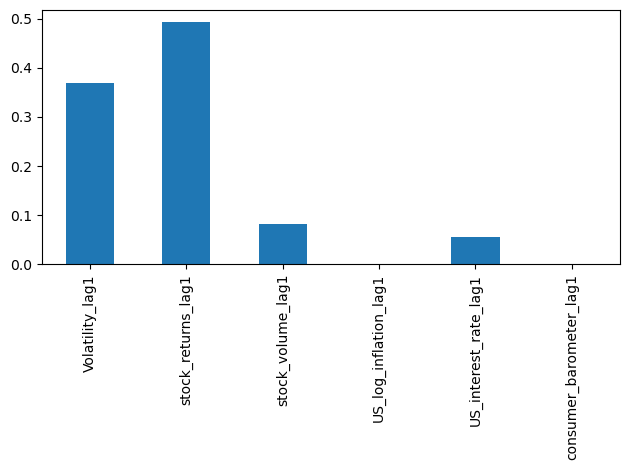

In [19]:
rf = RandomForestRegressor(max_depth=1, n_estimators=73)
rf.fit(X_train[1:], train_residuals)
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
fig, ax = plt.subplots()
importances.plot.bar(ax=ax)
fig.tight_layout()

Epoch 1/150
8/8 [==============================] - 1s 4ms/step - loss: 2.8209
Epoch 2/150
8/8 [==============================] - 0s 3ms/step - loss: 2.7822
Epoch 3/150
8/8 [==============================] - 0s 2ms/step - loss: 2.7694
Epoch 4/150
8/8 [==============================] - 0s 4ms/step - loss: 2.7152
Epoch 5/150
8/8 [==============================] - 0s 4ms/step - loss: 2.7179
Epoch 6/150
8/8 [==============================] - 0s 5ms/step - loss: 2.6910
Epoch 7/150
8/8 [==============================] - 0s 7ms/step - loss: 2.6788
Epoch 8/150
8/8 [==============================] - 0s 2ms/step - loss: 2.6842
Epoch 9/150
8/8 [==============================] - 0s 2ms/step - loss: 2.7440
Epoch 10/150
8/8 [==============================] - 0s 3ms/step - loss: 2.6277
Epoch 11/150
8/8 [==============================] - 0s 2ms/step - loss: 2.5981
Epoch 12/150
8/8 [==============================] - 0s 534us/step - loss: 2.6144
Epoch 13/150
8/8 [==============================] - 0s 3ms/

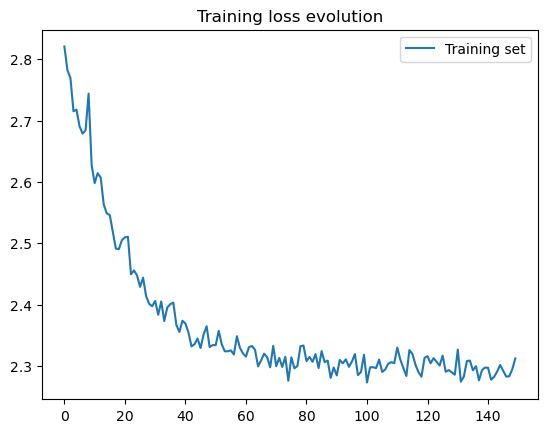

8/8 [==============================] - 0s 0s/step
RMSE: 1.359429016273653 R2: 0.01892403977334156


In [92]:
#try with 252 in lstm thing, maybe thats similar to rolling window?

#' units: Positive integer, dimensionality of the output space.' 
#soo i think not equivalent to window size lol...

#Try RNN:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, SimpleRNN
from tensorflow.keras.optimizers.legacy import Adam
import keras
from tensorflow.keras.layers import BatchNormalization


# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_daily_scaled = scaler.fit_transform(np.array(X_train['sentiment_lag'][1:]).reshape(-1, 1))
X_test_daily_scaled = scaler.transform(np.array(X_test['sentiment_lag']).reshape(-1, 1))

# Reshape input to be [samples, time steps, features]
X_train_daily_scaled = X_train_daily_scaled.reshape((X_train_daily_scaled.shape[0], 1, X_train_daily_scaled.shape[1]))
X_test_daily_scaled = X_test_daily_scaled.reshape((X_test_daily_scaled.shape[0], 1, X_test_daily_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(SimpleRNN(15, activation='relu', input_shape=(X_train_daily_scaled.shape[1], X_train_daily_scaled.shape[2]), return_sequences = True))
model.add(BatchNormalization())
model.add(SimpleRNN(10, return_sequences = False))
#model.add(GRU(30, return_sequences = False))
#model.add(LSTM(50, return_sequences = False))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(32, activation='tanh'))
#model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.25))
#model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=1e-4), loss='mean_squared_error')

# Fit the model
history = model.fit(
    X_train_daily_scaled, 
    train_residuals, 
    epochs=150, 
    batch_size=128, 
    verbose=1,
    shuffle = False
    )

plt.plot(history.history['loss'])
plt.title("Training loss evolution")
plt.legend(["Training set"])
plt.show()

predictions = model.predict(X_test_daily_scaled)
predictions = np.squeeze(predictions)  # This changes shape from (251, 1, 1) to (251,)
y_pred = pd.Series(predictions)

rmse_rnn = np.sqrt(mean_squared_error(np.array(test_residuals), y_pred))
r2_rnn = r2_score(np.array(test_residuals), y_pred)
print('RMSE:', rmse_rnn, 'R2:', r2_rnn)


In [100]:
forecast_AR1 = np.squeeze(forecast_AR1)
ar1_pred = pd.Series(forecast_AR1)

In [101]:
final_prediction = y_pred + ar1_pred

In [116]:
overall_sharpe(final_prediction)

ValueError: Length of values (251) does not match length of index (249)

In [132]:
X_test

,Volatility_lag1,stock_returns_lag1,stock_volume_lag1,US_log_inflation_lag1,US_interest_rate_lag1,consumer_barometer_lag1,sentiment_lag
Date,,,,,,,
2019-01-02,29.11,0.843285,53015300.0,0.068466,3.00,0.062721,0.237241
2019-01-03,27.36,0.401922,58576700.0,-0.081531,3.00,-0.556296,0.077907
2019-01-04,31.43,-3.267036,74820200.0,-0.081531,3.00,-0.556296,0.124141
2019-01-07,27.29,4.278461,74709300.0,-0.081531,3.00,-0.556296,0.229406
2019-01-08,26.25,1.190564,52059300.0,-0.081531,3.00,-0.556296,0.194924
...,...,...,...,...,...,...,...
2019-12-23,11.78,0.403121,27672600.0,0.290799,2.25,0.196109,0.203007
2019-12-24,12.34,0.264144,23774700.0,0.290799,2.25,0.196109,0.271406
2019-12-26,12.36,0.051936,7089000.0,0.290799,2.25,0.196109,0.214367


In [130]:
portfolio_df

,r_ndq,r_rf,rf_rate
Date,,,
2019-01-02,0.004019,0.002111,0.000096
2019-01-03,-0.032670,0.007948,0.000096
2019-01-04,0.042785,-0.008076,0.000096
2019-01-07,0.011906,-0.002778,0.000098
2019-01-08,0.009045,-0.002497,0.000098
...,...,...,...
2019-12-23,0.002641,-0.000906,0.000063
2019-12-24,0.000519,0.001724,0.000063
2019-12-26,0.008824,0.001450,0.000063


In [134]:
# find dates in X_test that arent in portfolio_df:
portfolio_df.index.difference(X_test.index)

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [135]:
X_test.index.difference(portfolio_df.index)

DatetimeIndex(['2019-10-14', '2019-11-11'], dtype='datetime64[ns]', name='Date', freq=None)

14-oct-2019: columbus day, 11-nov-2019: veterans day

In [136]:
X_test_filtered = X_test[~X_test.index.isin(X_test.index.difference(portfolio_df.index))]

In [139]:
final_prediction.index = X_test.index

In [171]:
final_prediction = final_prediction[~final_prediction.index.isin(final_prediction.index.difference(portfolio_df.index))]

In [172]:
overall_sharpe(final_prediction)*100

14.714127688286407

In [168]:
overall_sharpe(y_test[~y_test.index.isin(y_test.index.difference(portfolio_df.index))])*100

28.31715114318733

In [169]:
ar1_pred.index = X_test.index

In [170]:
overall_sharpe(ar1_pred[~ar1_pred.index.isin(ar1_pred.index.difference(portfolio_df.index))])*100

15.081715958338341

In [166]:
# just choosing random values for s (20) and r (15) here, would be better to optimize those as well!
# -> try optimizing with precentiles and rolling window / exponentially decaying window
def overall_sharpe(volatility_prediction):
    w_ndq = []
    w_rf = []
    for volatility in volatility_prediction:
        if volatility > 15:
            w_ndq.append(0)
            w_rf.append(1)
        elif volatility <= 15 and volatility > 13:
            w_ndq.append(0.6)
            w_rf.append(0.4)
        elif volatility <= 13:
            w_ndq.append(1)
            w_rf.append(0)
    portfolio_df['w_ndq'] = w_ndq
    portfolio_df['w_rf'] = w_rf
    portfolio_df['r_portfolio'] = portfolio_df['w_ndq'] * portfolio_df['r_ndq'] + portfolio_df['w_rf'] * portfolio_df['r_rf']
    mean_return_portfolio = portfolio_df['r_portfolio'].mean()
    std_portfolio = np.std(portfolio_df['r_portfolio'])
    mean_risk_free_rate = portfolio_df['rf_rate'].mean()
    sharpe_ratio = (mean_return_portfolio - mean_risk_free_rate)/std_portfolio
    return sharpe_ratio


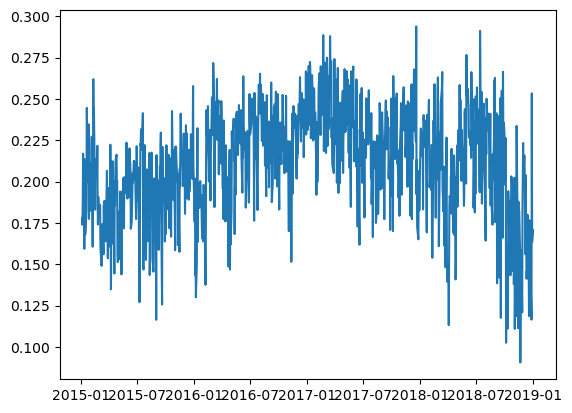

In [112]:
plt.plot(X_train['sentiment_lag'])

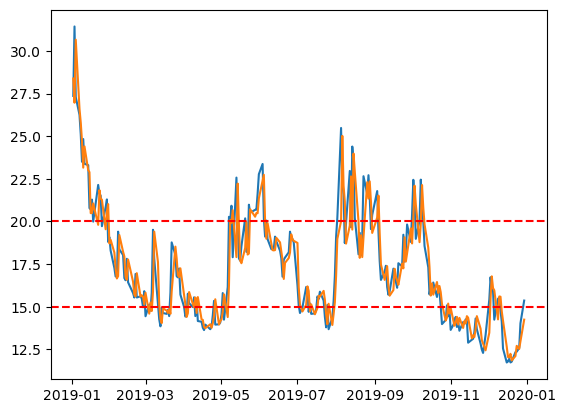

In [113]:
plt.plot(y_test)
#plt.plot(y_test.index, ar1_pred)
plt.plot(y_test.index, final_prediction)
plt.axhline(20, color = 'red', linestyle = '--')
plt.axhline(15, color = 'red', linestyle = '--')